# Author: Omkar Gangan


# Data Science And Business Analytics Internship¶


# The Spark Foundation

# GRIPJAN21

# Task :- 5 Perform ‘Exploratory Data Analysis’ on dataset Indian Premier League


Dataset link:-https://drive.google.com/file/d/18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw/view

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [585]:
# Reading Data
df = pd.read_excel('matches1.xlsx')

In [586]:
df.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In [56]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [59]:
df.drop('umpire3',axis=1,inplace=True)

In [50]:
winners = df['winner'].value_counts().head(3)
winners

Mumbai Indians           109
Chennai Super Kings      100
Kolkata Knight Riders     92
Name: winner, dtype: int64

# Most Successfull Team is Mumbai Indians with 109 wins

In [91]:
winners = df['winner'].value_counts().head(3)
winners

Mumbai Indians           109
Chennai Super Kings      100
Kolkata Knight Riders     92
Name: winner, dtype: int64

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

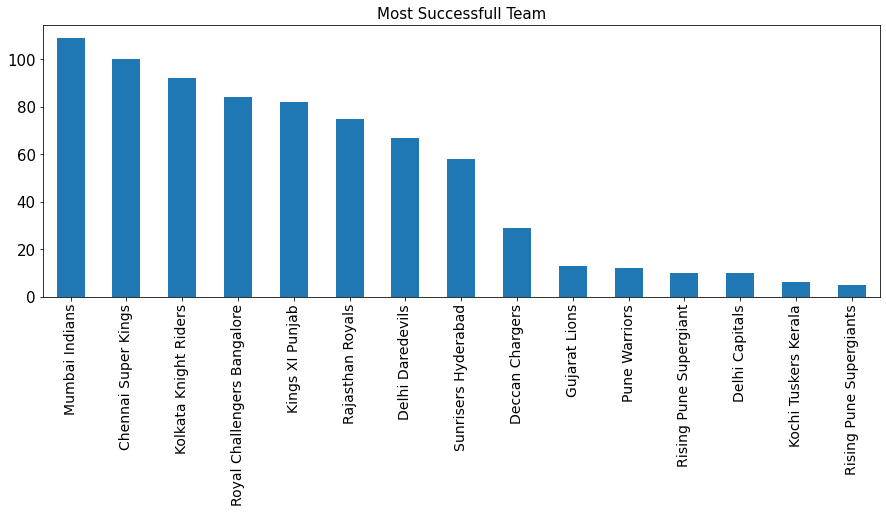

In [145]:
plt.figure(figsize=(15,5))
df['winner'].value_counts().plot.bar()
plt.title("Most Successfull Team",fontsize = 15)
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 15) 


# Mumbai Indians won 56 games while batting first and 53 games while batting second.

In [107]:
f = df[df['toss_winner'] == 'Mumbai Indians']['winner']
f

6             Mumbai Indians
9             Mumbai Indians
11            Mumbai Indians
15            Mumbai Indians
21            Mumbai Indians
               ...          
729           Mumbai Indians
742    Kolkata Knight Riders
746           Mumbai Indians
751           Mumbai Indians
755           Mumbai Indians
Name: winner, Length: 98, dtype: object

In [108]:
first = f[f=='Mumbai Indians'].value_counts()
first

Mumbai Indians    56
Name: winner, dtype: int64

In [110]:
second = 109-int(first)
second

53

# Most matches won by teams per season

In [194]:
for i in range(2008,2020):
    a = df[df['season']==i]['winner'].value_counts().head(1)
    print(f'Season {i} {a.index[0]} won most matches: {a[0]}')

Season 2008 Rajasthan Royals won most matches: 13
Season 2009 Delhi Daredevils won most matches: 10
Season 2010 Mumbai Indians won most matches: 11
Season 2011 Chennai Super Kings won most matches: 11
Season 2012 Kolkata Knight Riders won most matches: 12
Season 2013 Mumbai Indians won most matches: 13
Season 2014 Kings XI Punjab won most matches: 12
Season 2015 Chennai Super Kings won most matches: 10
Season 2016 Sunrisers Hyderabad won most matches: 11
Season 2017 Mumbai Indians won most matches: 12
Season 2018 Chennai Super Kings won most matches: 11
Season 2019 Mumbai Indians won most matches: 11


# Win by Maximum Runs (All Time)

In [198]:
df['win_by_runs'].max()

146

In [193]:
df[df['win_by_runs']==146]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


In [215]:
df.iloc[43]['team1']

'Mumbai Indians'

In [220]:
print(f"{df.iloc[43]['team1']} won by {df['win_by_runs'].max()} runs against {df.iloc[43]['team2']} in season {df.iloc[43]['season']}")

Mumbai Indians won by 146 runs against Delhi Daredevils in season 2017


# Most Player of Match (All time)

In [236]:
a = df['player_of_match'].value_counts().head(1)

In [239]:
print(f"{a.index[0]} won most Player Of Matches: {df['player_of_match'].value_counts().head(1)[0]}")

CH Gayle won most Player Of Matches: 21


# Most Player of Match per Season

In [288]:
for i in range(2008,2020):
    a = df[df['season']==i]['player_of_match'].value_counts().head(1)
    print(f'Season {i} {a.index[0]}: {a[0]}')

Season 2008 SE Marsh: 5
Season 2009 YK Pathan: 3
Season 2010 SR Tendulkar: 4
Season 2011 CH Gayle: 6
Season 2012 CH Gayle: 5
Season 2013 MEK Hussey: 5
Season 2014 GJ Maxwell: 4
Season 2015 DA Warner: 4
Season 2016 V Kohli: 5
Season 2017 NM Coulter-Nile: 3
Season 2018 Rashid Khan: 4
Season 2019 AD Russell: 4


# Most Player of Match (Recent season: 2017,2018,2019)

In [306]:
a = df[df['season']>2016]['player_of_match'].value_counts().head(3)
print(f"{a.index[0]} won most Player Of Matches:{a[0]}")
print(f"{a.index[1]} won most Player Of Matches   :{a[1]}")
print(f"{a.index[2]} won most Player Of Matches :{a[2]}")

Rashid Khan won most Player Of Matches:7
MS Dhoni won most Player Of Matches   :5
JC Buttler won most Player Of Matches :5


# Toss Decision

In [327]:
df['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text major ticklabel objects>)

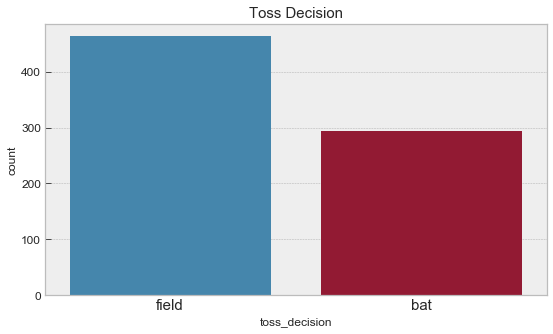

In [337]:
plt.figure(figsize=(9,5))
sns.countplot(df['toss_decision'],data=df)
plt.title("Toss Decision",fontsize = 15)
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 12) 

In [411]:
# 4 no result
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [471]:
n = df['result'].value_counts().index[2] 
no = df['result'].value_counts()[2]
print(n,no)

no result 4


In [459]:
win = 0
for index, value in df.iterrows():
    if(value['toss_winner']==value['winner']):
        win += 1

print(f'Toss winning team won {win} Matches')

Toss winning team won 393 Matches


In [460]:
total = len(df['winner'])
total

756

In [472]:
lost = total - win + no
print(f"Toss wining team lost {lost} Matches")

Toss wining team lost 367 Matches


# The probability of winning the toss wins the match

In [466]:
print(f'The probability of winning if won the toss: {win/len(df)}')

The probability of winning if won the toss: 0.5198412698412699


# The probability of winning match by fielding first

In [500]:
f = 0
b = 0
for index, value in df.iterrows():
    if (value['toss_decision']=='field' and value['toss_winner']==value['winner']):
        f += 1
    else:
        b += 1
print(f'Toss winning team won {f} matches by fielding first')
print(f"The probability of winning match by fielding first: {f/b}")

Toss winning team won 259 matches by fielding first
The probability of winning match by fielding first: 0.5211267605633803


# The probability of winning match by batting first

In [501]:
b = 0
f = 0
for index, value in df.iterrows():
    if (value['toss_decision']=='bat' and value['toss_winner']==value['winner']):
        b += 1
    else:
        f += 1
print(f'Toss winning team won {b} matches by batting first')
print(f"The probability of winning match by batting first: {b/f}")

Toss winning team won 134 matches by batting first
The probability of winning match by batting first: 0.21543408360128619


# City which hosted most matches

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

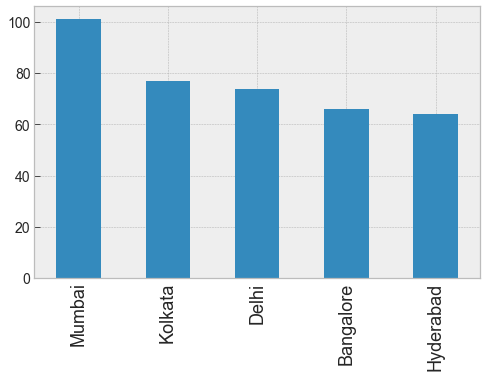

In [519]:
plt.figure(figsize=(8,5))
df['city'].value_counts().head(5).plot.bar()
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 14) 

# Stadiums which hosted most matches

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text major ticklabel objects>)

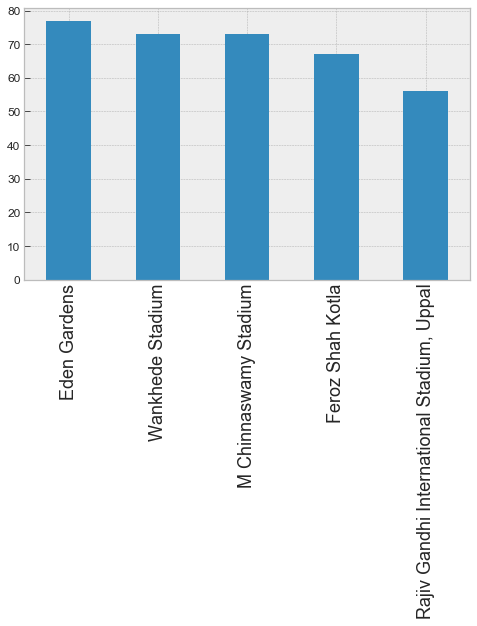

In [521]:
plt.figure(figsize=(8,5))
df['venue'].value_counts().head(5).plot.bar()
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 12) 

# Toss decision in every season

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

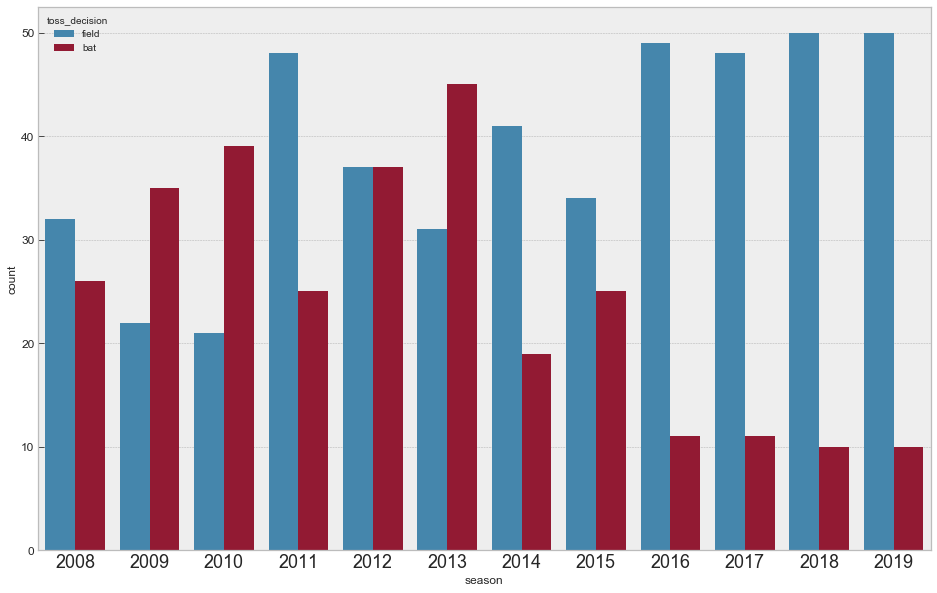

In [592]:
sns.countplot(x="season",hue="toss_decision",data=df)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 12) 

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

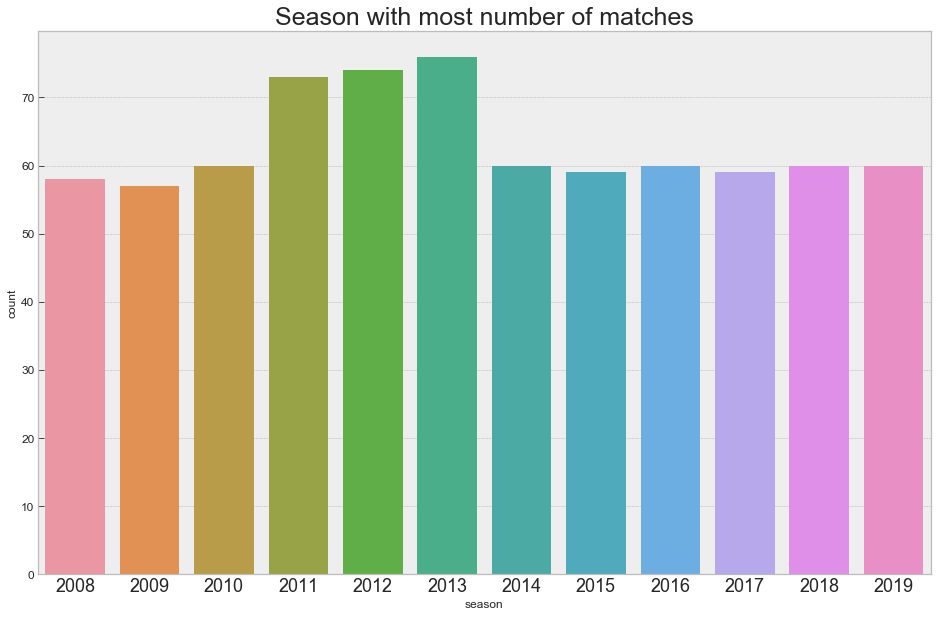

In [591]:
sns.countplot(x='season',data=df)
plt.title('Season with most number of matches',fontsize=25)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 12) 

In [522]:
df = pd.read_csv('deliveries.csv')

In [523]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Total Super over

In [538]:
print(f"Total Super Over: {df['is_super_over'].value_counts()[1]}")

Total Super Over: 81


# Thank You